Inspiration taken from https://medium.com/@nitishkundu1993/exploring-resnet50-an-in-depth-look-at-the-model-architecture-and-code-implementation-d8d8fa67e46f

Found 1838 files belonging to 6 classes.
Found 230 files belonging to 6 classes.
Epoch 1/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 134s 2s/step - accuracy: 0.4575 - loss: 1.7135 - val_accuracy: 0.6000 - val_loss: 1.0823
Epoch 2/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 116s 2s/step - accuracy: 0.6776 - loss: 0.8611 - val_accuracy: 0.6348 - val_loss: 1.0798
Epoch 3/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 120s 2s/step - accuracy: 0.7426 - loss: 0.7135 - val_accuracy: 0.6043 - val_loss: 1.1192
Epoch 4/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 123s 2s/step - accuracy: 0.7788 - loss: 0.5760 - val_accuracy: 0.6130 - val_loss: 1.0489
Epoch 5/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 117s 2s/step - accuracy: 0.8062 - loss: 0.5045 - val_accuracy: 0.5913 - val_loss: 1.1865
Epoch 6/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 115s 2s/step - accuracy: 0.8639 - loss: 0.4057 - val_accuracy: 0.5739 - val_loss: 1.1087
Epoch 7/10
58/58 ━━━━━━━━━━━━━━━━━━━━ 146s 2s/step - accuracy: 0.9020 - loss: 0.3114 - val_accuracy: 0.5783 - val_loss: 1.2682
Epoch 8/10
58/58 ━━━━━━━━━━━━━

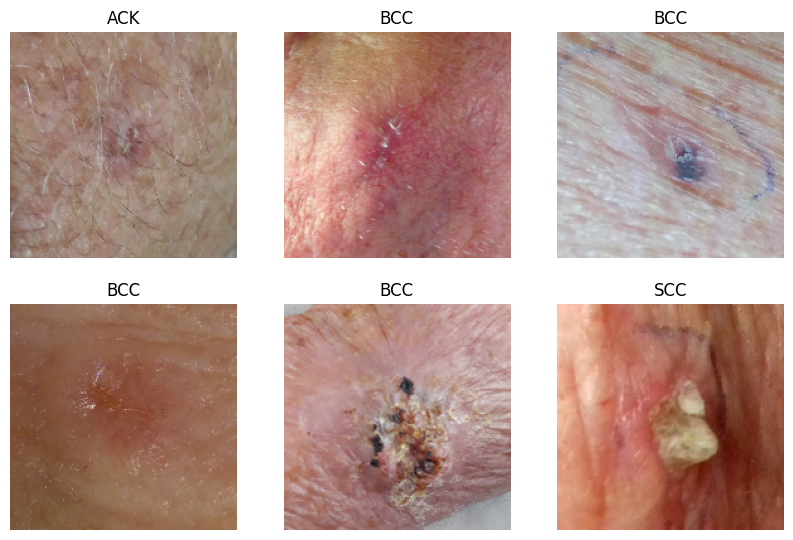

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

train_ds_directory = r'C:\Users\andre\dev\BSc-Project\Dataset\data\train'
val_ds_directory = r'C:\Users\andre\dev\BSc-Project\Dataset\data\val'
test_ds_directory = r'C:\Users\andre\dev\BSc-Project\Dataset\data\test'

# Define the image size and batch size
img_height, img_width = 180, 180
batch_size = 32


# Create the training and validation datasets
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_ds_directory,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
validation_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_ds_directory,
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Define class names
classnames = ['ACK', 'BCC', 'MEL', 'NEV', 'SCC', 'SEK']

# Plot some sample images from the dataset
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(classnames[labels[i]])
        plt.axis("off")



# Create the ResNet50 model and set the layers to be non-trainable
resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top=False,
                                                  input_shape=(img_height, img_width, 3),
                                                  pooling='avg',
                                                  weights='imagenet')

for layer in pretrained_model.layers:
    layer.trainable = False
resnet_model.add(pretrained_model)



# Add fully connected layers for classification
resnet_model.add(layers.Flatten())
resnet_model.add(layers.Dense(512, activation='relu'))
resnet_model.add(layers.Dense(6, activation='softmax'))

# Match 6 classes to output shape
train_ds = train_ds.map(lambda x, y: (x, tf.one_hot(y, depth=6)))
validation_ds = validation_ds.map(lambda x, y: (x, tf.one_hot(y, depth=6)))

# Compile and train the model
resnet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=10)

In [4]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


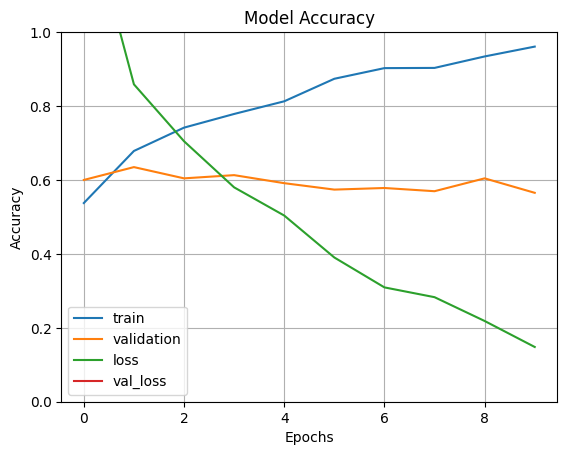

NameError: name 'data_directory' is not defined

In [5]:
# Evaluate the ResNet-50 model
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.axis(ymin=0, ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation', 'loss', 'val_loss'])
plt.show()



# Model Inference
# Preprocess the sample image
import cv2
import numpy as np

roses_path = data_directory / 'roses'
first_roses_image_path = next(roses_path.glob('*'))
image = cv2.imread(str(first_roses_image_path))
image_resized = cv2.resize(image, (img_height, img_width))
image = np.expand_dims(image_resized, axis=0)


# Make predictions
image_pred = resnet_model.predict(image)


# Produce a human-readable output label
image_output_class = classnames[np.argmax(image_pred)]
print("The predicted class is", image_output_class)